In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Data wrangling
## Data gathering

In [5]:
df = pd.read_csv('mcdonalds_dataset.csv')
df.head()

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
0,-73.988281,40.718830,0,False,True,working,NY,New York,114 Delancey St,USA,Checked 142 minutes ago
1,-74.005090,40.728794,0,False,True,working,NY,New York,208 Varick St,USA,Checked 142 minutes ago
2,-73.993408,40.729197,0,False,True,working,NY,New York,724 Broadway,USA,Checked 142 minutes ago
3,-73.985855,40.726555,0,False,True,working,NY,New York,102 1st Ave,USA,Checked 142 minutes ago
4,-73.991692,40.691383,0,True,True,broken,NY,Brooklyn,82 Court St,USA,Checked 142 minutes ago


## Data assessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           16671 non-null  float64
 1   lon           16671 non-null  float64
 2   alt           16671 non-null  int64  
 3   is_broken     16671 non-null  bool   
 4   is_active     16671 non-null  bool   
 5   dot           16671 non-null  object 
 6   state         12725 non-null  object 
 7   city          16663 non-null  object 
 8   street        16671 non-null  object 
 9   country       16671 non-null  object 
 10  last_checked  16671 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 1.2+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

lat                0
lon                0
alt                0
is_broken          0
is_active          0
dot                0
state           3946
city               8
street             0
country            0
last_checked       0
dtype: int64

In [9]:
df['last_checked'] = df['last_checked'].str.extract('(\d+)').astype(int)

In [10]:
df.head()

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
0,-73.988281,40.718830,0,False,True,working,NY,New York,114 Delancey St,USA,142
1,-74.005090,40.728794,0,False,True,working,NY,New York,208 Varick St,USA,142
2,-73.993408,40.729197,0,False,True,working,NY,New York,724 Broadway,USA,142
3,-73.985855,40.726555,0,False,True,working,NY,New York,102 1st Ave,USA,142
4,-73.991692,40.691383,0,True,True,broken,NY,Brooklyn,82 Court St,USA,142


In [11]:
df[df['city'].isna()]

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
14137,-0.084890,51.505407,0,False,True,working,NaN,NaN,Tooley Street,UK,17
14696,-1.548397,52.687450,0,False,True,working,NaN,NaN,Atherstone Road,UK,16
14810,-1.375880,53.088390,0,False,True,working,NaN,NaN,Hockley Way,UK,16
14943,-0.341025,53.744917,0,False,True,working,NaN,NaN,39-41 Jameson Street,UK,15
15146,-2.246980,53.794990,0,False,True,working,NaN,NaN,Princess Way,UK,15
15257,-1.496732,55.010379,0,False,True,working,NaN,NaN,Silverlink Retail Park,UK,14
15287,-5.930170,54.599170,0,False,True,working,NaN,NaN,2-4 Donegal Place,UK,14
15370,-4.331650,55.892067,0,False,True,working,NaN,NaN,1841 Great Western Road,UK,14


## Data cleaning

In [12]:
df.drop(columns='alt', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           16671 non-null  float64
 1   lon           16671 non-null  float64
 2   is_broken     16671 non-null  bool   
 3   is_active     16671 non-null  bool   
 4   dot           16671 non-null  object 
 5   state         12725 non-null  object 
 6   city          16663 non-null  object 
 7   street        16671 non-null  object 
 8   country       16671 non-null  object 
 9   last_checked  16671 non-null  int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.0+ MB


In [14]:
df.rename(columns={'dot' : 'status'}, inplace=True)

# Exploring data

In [15]:
df.describe()

,lat,lon,last_checked
count,16671.000000,16671.000000,16671.000000
mean,-76.600800,40.406232,69.752084
std,37.309030,7.250517,55.302564
min,-159.368738,19.517590,1.000000
25%,-95.572842,34.927834,19.000000
50%,-83.780231,40.213555,47.000000
75%,-75.261739,44.860442,124.000000
max,14.968594,64.859406,174.000000


In [17]:
df['country'].value_counts()

USA    12725
CA      1396
UK      1288
DE      1262
Name: country, dtype: int64

In [18]:
df.groupby(['is_broken', 'is_active']).count()

lat    lon  status  state   city  street  country  \
is_broken is_active                                                        
False     False        319    319     319    284    319     319      319   
          True       14495  14495   14495  11095  14487   14495    14495   
True      True        1857   1857    1857   1346   1857    1857     1857   

                     last_checked  
is_broken is_active                
False     False               319  
          True              14495  
True      True               1857

In [19]:
print('Number of inactive working machines:',df.query('is_active == False and is_broken == False').count()[1])

Number of inactive working machines: 319


In [20]:
print('Number of broken machines:',df.is_broken.sum())

Number of broken machines: 1857


In [39]:
df.groupby('country').sum()

/tmp/ipykernel_34/3604367011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('country').sum()


,lat,lon,is_broken,is_active,last_checked
country,,,,,
CA,-1.237736e+05,65730.044700,95,1396,13043
DE,1.216985e+04,64110.393033,213,1227,41503
UK,-2.114426e+03,67923.977169,203,1288,20308
USA,-1.163294e+06,475847.881677,1346,12441,1087983


In [22]:
dbroken = (d['is_broken'] / d['is_active'])*100

Text(0, 0.5, 'Broken machines percentage')

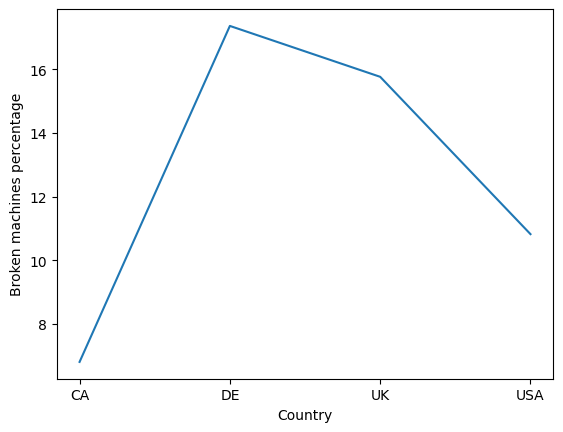

In [40]:
plt.plot(dbroken)
plt.xlabel("Country")
plt.ylabel("Broken machines percentage")

In [38]:
df.to_csv('mcdonalds_dataset_mod.csv')